In [ ]:
from google.colab.patches import cv2_imshow
from skimage import io
import os


import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
import random
import seaborn as sns
from tqdm.notebook import tqdm
from PIL import Image

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf
from keras_preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, Input

In [ ]:
from zipfile import ZipFile
filename = "Balanced.zip"

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
!pip install -q keras

In [ ]:
!pip install tensorflow

In [ ]:
len(os.listdir('Balanced'))

800

In [ ]:
f_list = os.listdir('Balanced')


f_num = len(f_list)
print('Number of images:', f_num)
print(f_list[0])

Number of images: 800
24_1_3_20170104234737428.jpg.chip.jpg


In [ ]:
df = pd.DataFrame(f_list, columns = ['train_name'])

df['train_gender'] = df.apply(lambda x : x['train_name'].split('_')[1], axis = 1).astype('int')

df['train_demographical_area'] = df.apply(lambda x : x['train_name'].split('_')[2], axis = 1).astype('int')
df.head()

,train_name,train_gender,train_demographical_area
0,24_1_3_20170104234737428.jpg.chip.jpg,1,3
1,30_1_0_20170109012829305.jpg.chip.jpg,1,0
2,28_0_2_20170116162829960.jpg.chip.jpg,0,2
3,29_0_3_20170119153035762.jpg.chip.jpg,0,3
4,30_0_2_20170103235423316.jpg.chip.jpg,0,2


Text(0.5, 1.0, 'Demographic Region Distribution in Dataset')

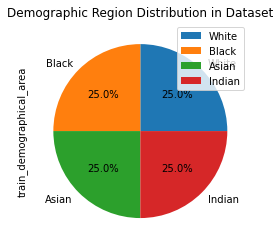

In [ ]:
df['train_demographical_area'].value_counts().plot.pie(autopct="%1.1f%%", labels = ['White' , 'Black' , 'Asian' , 'Indian'])
plt.legend()
plt.title("Demographic Region Distribution in Dataset")

Text(0.5, 1.0, 'Gender Distribution in Dataset')

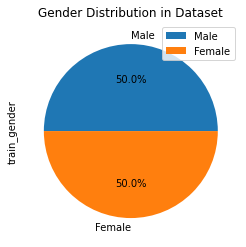

In [ ]:
df['train_gender'].value_counts().plot.pie(autopct="%1.1f%%", labels = ['Male' , 'Female'])
plt.legend()
plt.title('Gender Distribution in Dataset')

In [ ]:
from zipfile import ZipFile
filename = "all.zip"

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
t_list = os.listdir('all')


t_num = len(t_list)
print('Number of images:', _num)
print(t_list)

Number of images: 104
['24_1_3_20170104234737428.jpg.chip.jpg', '30_1_0_20170109012829305.jpg.chip.jpg', '28_0_2_20170116162829960.jpg.chip.jpg', '29_0_3_20170119153035762.jpg.chip.jpg', '30_0_2_20170103235423316.jpg.chip.jpg', '29_1_2_20170116163921292.jpg.chip.jpg', '28_1_1_20170112230737559.jpg.chip.jpg', '29_0_1_20170104220317630.jpg.chip.jpg', '21_0_3_20170104230524803.jpg.chip.jpg', '27_0_1_20170113175536164.jpg.chip.jpg', '26_0_1_20170113134328745.jpg.chip.jpg', '25_1_3_20170104222350215.jpg.chip.jpg', '28_0_2_20170116162117606.jpg.chip.jpg', '22_1_3_20170104222547654.jpg.chip.jpg', '29_1_1_20170112205844564.jpg.chip.jpg', '23_0_2_20170116172858865.jpg.chip.jpg', '22_0_0_20170111181750310.jpg.chip.jpg', '25_0_1_20170113145615148.jpg.chip.jpg', '25_1_2_20170104020339110.jpg.chip.jpg', '27_0_2_20170116174628743.jpg.chip.jpg', '23_0_0_20170117144550331.jpg.chip.jpg', '24_0_1_20170113132543250.jpg.chip.jpg', '25_0_2_20170104192902767.jpg.chip.jpg', '25_1_0_20170104022204452.jpg.chip

In [ ]:

df_test = pd.DataFrame(t_list, columns = ['test_name'])

df_test['test_gender'] = df_test.apply(lambda x : x['test_name'].split('_')[1], axis = 1).astype('int')

df_test.head()

,test_name,test_gender
0,31_1_3_20170119155508987.jpg.chip.jpg,1
1,31_1_2_20170104020928085.jpg.chip.jpg,1
2,31_1_1_20170103183224642.jpg.chip.jpg,1
3,31_1_1_20170112210531485.jpg.chip.jpg,1
4,31_1_3_20170119200201348.jpg.chip.jpg,1


In [ ]:
test_gender = np.array(df_test['test_gender'])

print(test_gender)

[1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0]


In [ ]:
def test_dataset(images):
    dataset = []
    for image in tqdm(images):
        image = "all/"+image
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128))
        img = np.array(img)
        dataset.append(img)

    dataset = np.array(dataset)

    return dataset

In [ ]:
testset = test_dataset(df_test['test_name'])

  0%|          | 0/104 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [ ]:
gender_dict = {0:"Male", 1:"Female"}

In [ ]:
input_shape = (128, 128, 1)

In [ ]:
inputs = Input((input_shape))
# convolutional layers
convolution_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxpool_1 = MaxPooling2D(pool_size=(2, 2)) (convolution_1)

convolution_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxpool_1)
maxpool_2 = MaxPooling2D(pool_size=(2, 2)) (convolution_2)

convolution_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxpool_2)
maxpool_3 = MaxPooling2D(pool_size=(2, 2)) (convolution_3)

convolution_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxpool_3)
maxpool_4 = MaxPooling2D(pool_size=(2, 2)) (convolution_4)

flatten = Flatten() (maxpool_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)


dropout_1 = Dropout(0.3) (dense_1)


output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)


model = Model(inputs=[inputs], outputs=[output_1])

model.compile(loss=['binary_crossentropy'], optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 128)       7385

In [ ]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
clahe = cv2.createCLAHE(clipLimit = 3, tileGridSize=(8,8))



def extract_Clahe_features(images):
    Clahe_features = []
    for image in tqdm(images):
        image = "Balanced/"+image
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128) )
        img = np.array(img)
        clahe_img = clahe.apply(img)
        Clahe_features.append(img)

    Clahe_features = np.array(Clahe_features)

    return Clahe_features


In [ ]:
X_Clahe = extract_Clahe_features(df['train_name'])

  0%|          | 0/800 [00:00<?, ?it/s]

In [ ]:
y_gender = np.array(df['train_gender'])

print(y_gender)

[1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0
 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0
 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0
 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0
 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0
 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1
 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1
 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1
 0 0 0 1 0 0 0 1 1 1 1 0 

In [ ]:
X_Clahe = X_Clahe/255.0

Hyperparameter 1

In [ ]:
model.compile(loss=['binary_crossentropy'], optimizer='adam', metrics=['accuracy'])
history1 = model.fit(x=X_Clahe, y=y_gender, batch_size=30, epochs=10, validation_split=0.3)

Epoch 1/10
19/19 [==============================] - 22s 1s/step - loss: 0.6854 - accuracy: 0.5536 - val_loss: 0.6251 - val_accuracy: 0.6875
Epoch 2/10
19/19 [==============================] - 23s 1s/step - loss: 0.5835 - accuracy: 0.7107 - val_loss: 0.6275 - val_accuracy: 0.6417
Epoch 3/10
19/19 [==============================] - 22s 1s/step - loss: 0.4826 - accuracy: 0.7732 - val_loss: 0.4189 - val_accuracy: 0.8250
Epoch 4/10
19/19 [==============================] - 22s 1s/step - loss: 0.3282 - accuracy: 0.8571 - val_loss: 0.3616 - val_accuracy: 0.8500
Epoch 5/10
19/19 [==============================] - 21s 1s/step - loss: 0.2773 - accuracy: 0.9018 - val_loss: 0.3676 - val_accuracy: 0.8542
Epoch 6/10
19/19 [==============================] - 22s 1s/step - loss: 0.2131 - accuracy: 0.9054 - val_loss: 0.3492 - val_accuracy: 0.8458
Epoch 7/10
19/19 [==============================] - 22s 1s/step - loss: 0.2015 - accuracy: 0.9214 - val_loss: 0.3325 - val_accuracy: 0.8708
Epoch 8/10
19/19 [==

4/4 [==============================] - 1s 219ms/step


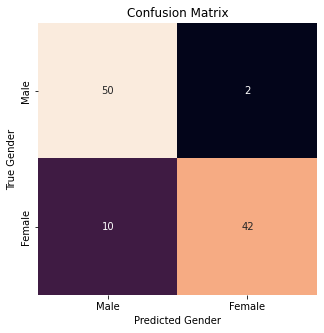

In [ ]:
pred1 = model.predict(testset)
rounded_pred1 = np.round(pred1)

res1 = tf.math.confusion_matrix(test_gender,rounded_pred1)
import seaborn as sn

plt.figure(figsize=(5,5))
ax= plt.subplot()
sn.heatmap(res1, annot=True, fmt = 'd', ax= ax ,cbar=False)

# labels, title and ticks
ax.set_xlabel('Predicted Gender');ax.set_ylabel('True Gender');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Male', 'Female']); ax.yaxis.set_ticklabels(['Male', 'Female']);

In [ ]:
model.evaluate(testset, test_gender)

4/4 [==============================] - 1s 225ms/step - loss: 40.4825 - accuracy: 0.8846


[40.48249053955078, 0.8846153616905212]

In [ ]:
!rm -rf 'Train Dataset'

HyperParameter 2

In [ ]:
model.compile(loss=['binary_crossentropy'], optimizer='adam', metrics=['accuracy'])
history2 = model.fit(x=X_Clahe, y=y_gender, batch_size=40, epochs=10, validation_split=0.3)

Epoch 1/10
14/14 [==============================] - 22s 2s/step - loss: 0.6927 - accuracy: 0.5214 - val_loss: 0.6891 - val_accuracy: 0.5000
Epoch 2/10
14/14 [==============================] - 22s 2s/step - loss: 0.6664 - accuracy: 0.5696 - val_loss: 0.6206 - val_accuracy: 0.6667
Epoch 3/10
14/14 [==============================] - 22s 2s/step - loss: 0.5843 - accuracy: 0.7143 - val_loss: 0.6062 - val_accuracy: 0.6833
Epoch 4/10
14/14 [==============================] - 23s 2s/step - loss: 0.4646 - accuracy: 0.7911 - val_loss: 0.4714 - val_accuracy: 0.7792
Epoch 5/10
14/14 [==============================] - 21s 2s/step - loss: 0.3876 - accuracy: 0.8339 - val_loss: 0.4140 - val_accuracy: 0.8417
Epoch 6/10
14/14 [==============================] - 21s 2s/step - loss: 0.3420 - accuracy: 0.8554 - val_loss: 0.3861 - val_accuracy: 0.8458
Epoch 7/10
14/14 [==============================] - 22s 2s/step - loss: 0.2562 - accuracy: 0.9000 - val_loss: 0.3212 - val_accuracy: 0.9000
Epoch 8/10
14/14 [==

4/4 [==============================] - 1s 277ms/step


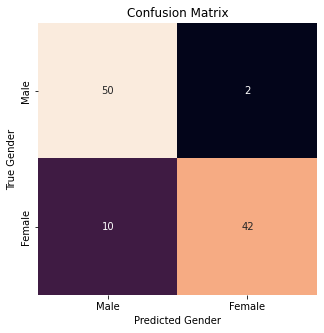

In [ ]:
pred2 = model.predict(testset)
rounded_pred2 = np.round(pred2)

res2 = tf.math.confusion_matrix(test_gender,rounded_pred1)
import seaborn as sn

plt.figure(figsize=(5,5))
ax= plt.subplot()
sn.heatmap(res2, annot=True, fmt = 'd', ax= ax ,cbar=False)

# labels, title and ticks
ax.set_xlabel('Predicted Gender');ax.set_ylabel('True Gender');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Male', 'Female']); ax.yaxis.set_ticklabels(['Male', 'Female']);

In [ ]:
model.evaluate(testset, test_gender)

4/4 [==============================] - 1s 211ms/step - loss: 26.9414 - accuracy: 0.8942


[26.941356658935547, 0.8942307829856873]

Hyperparameter 3

In [ ]:
model.compile(loss=['binary_crossentropy'], optimizer='adam', metrics=['accuracy'])
history3 = model.fit(x=X_Clahe, y=y_gender, batch_size=30, epochs=20, validation_split=0.3)

Epoch 1/20
19/19 [==============================] - 23s 1s/step - loss: 0.7126 - accuracy: 0.5161 - val_loss: 0.6871 - val_accuracy: 0.5542
Epoch 2/20
19/19 [==============================] - 21s 1s/step - loss: 0.6458 - accuracy: 0.6857 - val_loss: 0.6260 - val_accuracy: 0.6417
Epoch 3/20
19/19 [==============================] - 22s 1s/step - loss: 0.5416 - accuracy: 0.7143 - val_loss: 0.5075 - val_accuracy: 0.7625
Epoch 4/20
19/19 [==============================] - 23s 1s/step - loss: 0.4432 - accuracy: 0.8250 - val_loss: 0.4786 - val_accuracy: 0.7958
Epoch 5/20
19/19 [==============================] - 22s 1s/step - loss: 0.3891 - accuracy: 0.8268 - val_loss: 0.4000 - val_accuracy: 0.8292
Epoch 6/20
19/19 [==============================] - 22s 1s/step - loss: 0.3104 - accuracy: 0.8679 - val_loss: 0.3760 - val_accuracy: 0.8583
Epoch 7/20
19/19 [==============================] - 21s 1s/step - loss: 0.2954 - accuracy: 0.8714 - val_loss: 0.3228 - val_accuracy: 0.8708
Epoch 8/20
19/19 [==

4/4 [==============================] - 1s 263ms/step


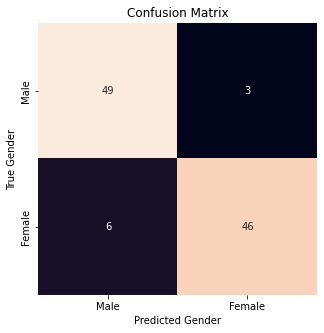

In [ ]:
pred3 = model.predict(testset)
rounded_pred3 = np.round(pred3)

res3 = tf.math.confusion_matrix(test_gender,rounded_pred3)
import seaborn as sn

plt.figure(figsize=(5,5))
ax= plt.subplot()
sn.heatmap(res3, annot=True, fmt = 'd', ax= ax ,cbar=False)

# labels, title and ticks
ax.set_xlabel('Predicted Gender');ax.set_ylabel('True Gender');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Male', 'Female']); ax.yaxis.set_ticklabels(['Male', 'Female']);

In [ ]:
model.evaluate(testset, test_gender)

4/4 [==============================] - 1s 238ms/step - loss: 59.1999 - accuracy: 0.9135


[59.199893951416016, 0.9134615659713745]

Hyperparameter 4

In [ ]:
model.compile(loss=['binary_crossentropy'], optimizer='adam', metrics=['accuracy'])
history1 = model.fit(x=X_Clahe, y=y_gender, batch_size=40, epochs=20, validation_split=0.3)

Epoch 1/20
14/14 [==============================] - 29s 2s/step - loss: 0.7036 - accuracy: 0.5411 - val_loss: 0.6831 - val_accuracy: 0.4917
Epoch 2/20
14/14 [==============================] - 25s 2s/step - loss: 0.6344 - accuracy: 0.6161 - val_loss: 0.5860 - val_accuracy: 0.7042
Epoch 3/20
14/14 [==============================] - 22s 2s/step - loss: 0.5705 - accuracy: 0.7321 - val_loss: 0.5505 - val_accuracy: 0.7208
Epoch 4/20
14/14 [==============================] - 22s 2s/step - loss: 0.4802 - accuracy: 0.7839 - val_loss: 0.4632 - val_accuracy: 0.8250
Epoch 5/20
14/14 [==============================] - 23s 2s/step - loss: 0.3985 - accuracy: 0.8518 - val_loss: 0.3803 - val_accuracy: 0.8500
Epoch 6/20
14/14 [==============================] - 22s 2s/step - loss: 0.3228 - accuracy: 0.8554 - val_loss: 0.3939 - val_accuracy: 0.7792
Epoch 7/20
14/14 [==============================] - 22s 2s/step - loss: 0.2982 - accuracy: 0.8893 - val_loss: 0.3386 - val_accuracy: 0.8625
Epoch 8/20
14/14 [==

4/4 [==============================] - 1s 329ms/step


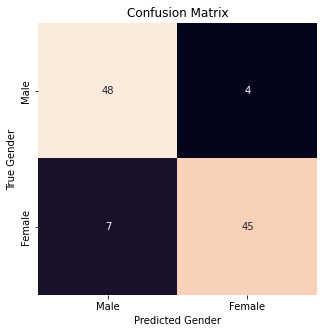

In [ ]:
pred4 = model.predict(testset)
rounded_pred4 = np.round(pred4)

res4 = tf.math.confusion_matrix(test_gender,rounded_pred4)
import seaborn as sn

plt.figure(figsize=(5,5))
ax= plt.subplot()
sn.heatmap(res4, annot=True, fmt = 'd', ax= ax ,cbar=False)

# labels, title and ticks
ax.set_xlabel('Predicted Gender');ax.set_ylabel('True Gender');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Male', 'Female']); ax.yaxis.set_ticklabels(['Male', 'Female']);

In [ ]:
model.evaluate(testset, test_gender)

4/4 [==============================] - 2s 432ms/step - loss: 57.8849 - accuracy: 0.8942


[57.88485336303711, 0.8942307829856873]